# Del 1: Pandas Time Series - Vaje

## Vaja 1

###  Import the necessary libraries

In [1]:
import pandas as pd

### Import the dataset from URL and assign it to a variable apple

In [2]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'

In [3]:
apple = pd.read_csv(url)

### Check out the type of the columns

In [4]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Transform the Date column as a datetime type

In [5]:
apple['Date'] = pd.to_datetime(apple['Date'])
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Set the date as the index

In [6]:
apple.set_index('Date', inplace=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Is there any duplicate dates?

In [7]:
#ni podvojenih datumov
apple[apple.duplicated(keep=False)]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,


### Sort the index to be the first entry the oldest date

In [8]:
apple.sort_values(by=['Date'], inplace=True, ascending=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Get the last business day of each month

In [9]:
apple2 = apple.copy()

In [10]:
apple2['WkDay'] = apple.index.dayofweek
apple2['mY'] = apple2.index.to_series().dt.to_period('M')
apple2.head()
#apple2 = apple.groupby('Y-m').max()

,Open,High,Low,Close,Volume,Adj Close,WkDay,mY
Date,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,4,1980-12
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,0,1980-12
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,1,1980-12
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,2,1980-12
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,3,1980-12


In [11]:
#v nizu ni dni z weekday > 4 -> to pomeni, da vikendov ni
apple2['WkDay'].max()

4

In [12]:
last_wk_day = apple2.groupby(['mY']).tail(1)

In [14]:
last_wk_day.head()

,Open,High,Low,Close,Volume,Adj Close,WkDay,mY
Date,,,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53,2,1980-12
1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44,4,1981-01
1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41,4,1981-02
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38,1,1981-03
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44,3,1981-04


### What is the difference in days between the first day and the oldest

In [15]:
dif = apple.index.max()-apple.index.min()
dif

Timedelta('12261 days 00:00:00')

### How many months in the data we have?

In [16]:
st_mesecev = len(apple.index.to_series().dt.to_period('M').unique())
print('V podatkih so '+str(st_mesecev)+' meseci.')

V podatkih so 404 meseci.


### Plot the 'Adj Close' value

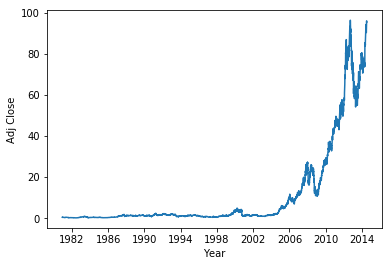

In [20]:
import matplotlib.pyplot as plt
plt.plot(apple['Adj Close'])
plt.xlabel('Year')
plt.ylabel('Adj Close')
plt.show()